In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.model_selection import learning_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv('fifa_players.csv')

In [4]:
df.head()

,name,full_name,birth_date,age,height_cm,weight_kgs,positions,nationality,overall_rating,potential,...,long_shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle
0,L. Messi,Lionel Andrés Messi Cuccittini,6/24/1987,31,170.18,72.1,"CF,RW,ST",Argentina,94,94,...,94,48,22,94,94,75,96,33,28,26
1,C. Eriksen,Christian Dannemann Eriksen,2/14/1992,27,154.94,76.2,"CAM,RM,CM",Denmark,88,89,...,89,46,56,84,91,67,88,59,57,22
2,P. Pogba,Paul Pogba,3/15/1993,25,190.50,83.9,"CM,CAM",France,88,91,...,82,78,64,82,88,82,87,63,67,67
3,L. Insigne,Lorenzo Insigne,6/4/1991,27,162.56,59.0,"LW,ST",Italy,88,88,...,84,34,26,83,87,61,83,51,24,22
4,K. Koulibaly,Kalidou Koulibaly,6/20/1991,27,187.96,88.9,CB,Senegal,88,91,...,15,87,88,24,49,33,80,91,88,87


In [5]:
df.describe()

,age,height_cm,weight_kgs,overall_rating,potential,value_euro,wage_euro,international_reputation(1-5),weak_foot(1-5),skill_moves(1-5),...,long_shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle
count,17954.000000,17954.000000,17954.000000,17954.000000,17954.000000,1.769900e+04,17708.000000,17954.000000,17954.000000,17954.000000,...,17954.000000,17954.000000,17954.000000,17954.000000,17954.000000,17954.000000,17954.000000,17954.000000,17954.000000,17954.000000
mean,25.565445,174.946921,75.301047,66.240169,71.430935,2.479280e+06,9902.134628,1.111674,2.945695,2.361034,...,46.852456,55.816531,46.657959,49.857302,53.406260,48.357302,58.680183,47.162861,47.733040,45.705915
std,4.705708,14.029449,7.083684,6.963730,6.131339,5.687014e+06,21995.593750,0.392168,0.663691,0.763223,...,19.429337,17.394047,20.754649,19.694311,14.156038,15.810844,11.625541,20.037346,21.674973,21.285812
min,17.000000,152.400000,49.900000,47.000000,48.000000,1.000000e+04,1000.000000,1.000000,1.000000,1.000000,...,3.000000,11.000000,3.000000,2.000000,10.000000,5.000000,12.000000,3.000000,2.000000,3.000000
25%,22.000000,154.940000,69.900000,62.000000,67.000000,3.250000e+05,1000.000000,1.000000,3.000000,2.000000,...,32.000000,44.000000,26.000000,38.000000,44.000000,38.000000,51.000000,30.000000,27.000000,24.000000
50%,25.000000,175.260000,74.800000,66.000000,71.000000,7.000000e+05,3000.000000,1.000000,3.000000,2.000000,...,51.000000,59.000000,52.000000,55.000000,55.000000,49.000000,60.000000,52.500000,55.000000,52.000000
75%,29.000000,185.420000,79.800000,71.000000,75.000000,2.100000e+06,9000.000000,1.000000,3.000000,3.000000,...,62.000000,69.000000,64.000000,64.000000,64.000000,60.000000,67.000000,64.000000,66.000000,64.000000
max,46.000000,205.740000,110.200000,94.000000,95.000000,1.105000e+08,565000.000000,5.000000,5.000000,5.000000,...,94.000000,95.000000,92.000000,95.000000,94.000000,92.000000,96.000000,94.000000,93.000000,90.000000


In [6]:
# Estandarización de características comúnmente distribuidas normalmente
standard_features = ['overall_rating']
scaler = StandardScaler()
df[standard_features] = scaler.fit_transform(df[standard_features])

# Escalado Min-Max para características sin outliers significativos
minmax_features = ['shot_power', 'dribbling']
minmax_scaler = MinMaxScaler()
df[minmax_features] = minmax_scaler.fit_transform(df[minmax_features])

# Escalado Robusto para características con posibles outliers
robust_features = ['age', 'weight_kgs']
robust_scaler = RobustScaler()
df[robust_features] = robust_scaler.fit_transform(df[robust_features])

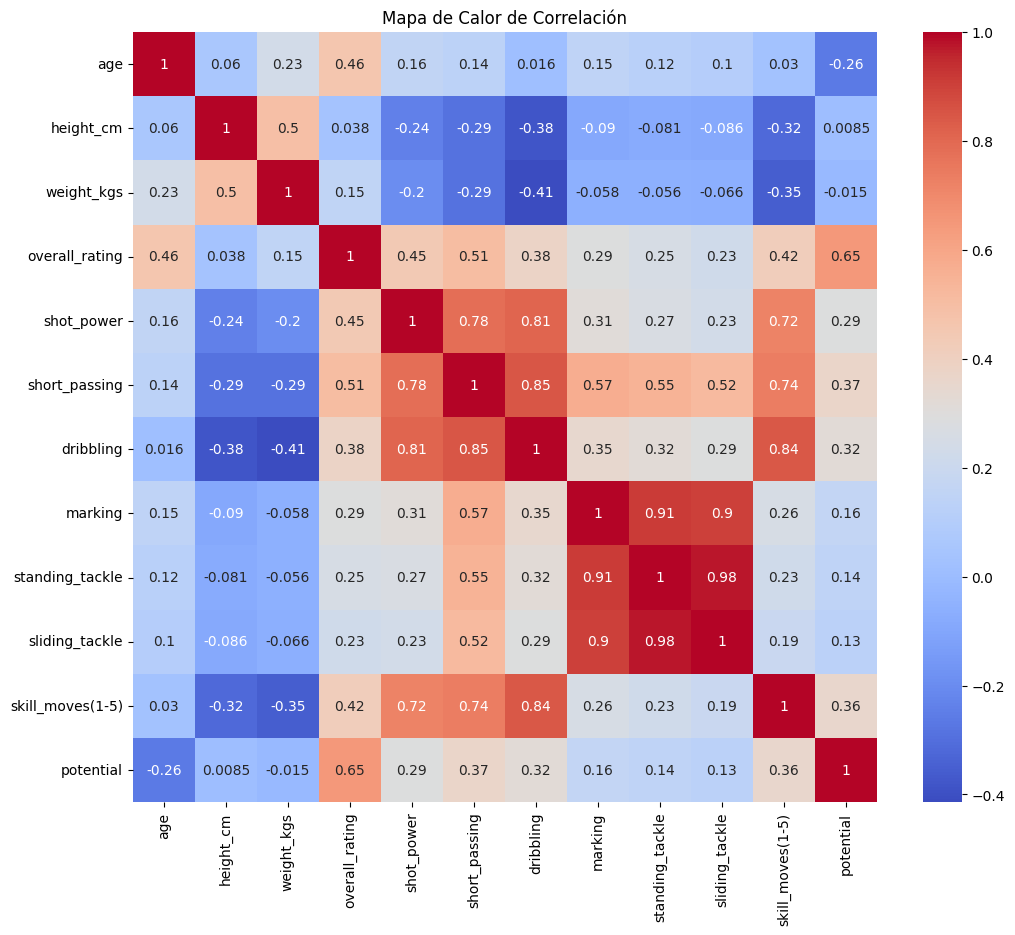

In [7]:

# Lista de características relevantes para la predicción del potencial
features = [
    'age', 'height_cm', 'weight_kgs', 'overall_rating', 'shot_power', 'short_passing', 'dribbling', 'marking', 'standing_tackle', 'sliding_tackle', 'skill_moves(1-5)'
]
features.append('potential')  # Incluyendo la variable objetivo


# Seleccionando solo las columnas necesarias y eliminando filas con valores nulos
df_selected = df[features].dropna()

# Mapa de calor para visualizar correlaciones
plt.figure(figsize=(12, 10))
sns.heatmap(df_selected.corr(), annot=True, cmap='coolwarm')
plt.title('Mapa de Calor de Correlación')
plt.show()

# Preparando los datos para el modelado
X = df_selected.drop('potential', axis=1)
y = df_selected['potential']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Estandarización de los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [8]:
lr = LinearRegression()
lr.fit(X_train, y_train)

lr.predict(X_test)

accuracy = lr.score(X_test, y_test)
print(accuracy)

0.822074733233692


In [9]:
lr.predict(X_test_scaled)

c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([62.25480035, 81.10780084, 76.56339105, ..., 68.40994182,
       81.43144204, 74.13099089])

In [17]:
from sklearn.metrics import mean_squared_error, r2_score

# Predicciones y evaluación
y_pred_sin_scaling = lr.predict(X_test)
mse_sin_scaling = mean_squared_error(y_test, y_pred_sin_scaling)
r2_sin_scaling = r2_score(y_test, y_pred_sin_scaling)

print("Resultados sin estandarización:")
print("Error cuadrático medio:", mse_sin_scaling)
print("R^2:", r2_sin_scaling)

Resultados sin estandarización:
Error cuadrático medio: 6.772985486697789
R^2: 0.822074733233692


In [16]:
### MODELO CON ESTANDARIZACIÓN ###
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Ajustar y transformar datos
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

modelo_con_scaling = LinearRegression()
modelo_con_scaling.fit(X_train_scaled, y_train)

# Predicciones y evaluación
y_pred_con_scaling = modelo_con_scaling.predict(X_test_scaled)
mse_con_scaling = mean_squared_error(y_test, y_pred_con_scaling)
r2_con_scaling = r2_score(y_test, y_pred_con_scaling)

print("Resultados con estandarización:")
print("Error cuadrático medio:", mse_con_scaling)
print("R^2:", r2_con_scaling)

Resultados con estandarización:
Error cuadrático medio: 6.772985486697791
R^2: 0.8220747332336918


In [18]:
from tabulate import tabulate

# Crear la tabla de resultados con valores redondeados a 2 decimales
tabla_resultados = [
    ["Error Cuadrático Medio (MSE)", round(mse_sin_scaling, 2), round(mse_con_scaling, 2)],
    ["Coeficiente de Determinación (R²)", round(r2_sin_scaling, 2), round(r2_con_scaling, 2)]
]

# Imprimir la tabla con formato "pretty"
print(tabulate(tabla_resultados, headers=["Métrica", "Sin Estandarizar", "Con Estandarización"], tablefmt="pretty"))


+-----------------------------------+------------------+---------------------+
|              Métrica              | Sin Estandarizar | Con Estandarización |
+-----------------------------------+------------------+---------------------+
|   Error Cuadrático Medio (MSE)    |       6.77       |        6.77         |
| Coeficiente de Determinación (R²) |       0.82       |        0.82         |
+-----------------------------------+------------------+---------------------+


In [19]:
from sklearn.model_selection import cross_val_score

# Validación cruzada sin estandarización
scores_sin_scaling = cross_val_score(lr, X, y, cv=5, scoring='r2')

print("Validación cruzada (sin estandarización):")
print("R² en cada fold:", scores_sin_scaling)
print("Media del R²:", scores_sin_scaling.mean())
print("Desviación estándar del R²:", scores_sin_scaling.std())


Validación cruzada (sin estandarización):
R² en cada fold: [0.82726905 0.53978461 0.71519585 0.69678638 0.73464   ]
Media del R²: 0.7027351791619474
Desviación estándar del R²: 0.09302703545697084


In [20]:
# Validación cruzada con estandarización
scores_con_scaling = cross_val_score(modelo_con_scaling, scaler.transform(X), y, cv=5, scoring='r2')

print("\nValidación cruzada (con estandarización):")
print("R² en cada fold:", scores_con_scaling)
print("Media del R²:", scores_con_scaling.mean())
print("Desviación estándar del R²:", scores_con_scaling.std())


Validación cruzada (con estandarización):
R² en cada fold: [0.82726905 0.53978461 0.71519585 0.69678638 0.73464   ]
Media del R²: 0.7027351791619475
Desviación estándar del R²: 0.09302703545697581
